# Neural Network From scratch
**Objective:**
To build a Neural network using numpy array, applying concepts learned from the course: Calculus for Data Science and Machine Learning by DeepLearining.AI


## Importing Required Libraries
1. Pandas:  read data, visualise data
2. numpy:  matrix computation, mathematical expressions
3. matplotlib: visualise data
4. sklearn.model_selection.train_test_split: split data for training and validating

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
print('Setup Completed')

Setup Completed


## Data Collection & Pre-processing
1. Reading data using pandas
2. Walking through data
3. Dropping categorical data and working only on numerical data
4. Splitting inputs and output
5. separating 500 data for testing

In [2]:
Data= pd.read_csv('WestRoxbury-1.csv')

In [3]:
Data.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,NaN
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,NaN
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,NaN
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,NaN


In [4]:
list(Data.drop(['TOTAL VALUE '],axis=1).iloc[0])

[4330, 9965, 1880, 2436, 1352, 2.0, 6, 3, 1, 1, 1, 0, nan]

In [5]:
Data.isnull().sum()

TOTAL VALUE        0
TAX                0
LOT SQFT           0
YR BUILT           0
GROSS AREA         0
LIVING AREA        0
FLOORS             0
ROOMS              0
BEDROOMS           0
FULL BATH          0
HALF BATH          0
KITCHEN            0
FIREPLACE          0
REMODEL         4346
dtype: int64

In [6]:
Data=Data.drop(['REMODEL'], axis=1)

In [7]:
Data.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0


In [8]:
Data.describe()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


In [9]:
 Data.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE'],
      dtype='object')

In [10]:
for i in Data.columns:
    print(f"const {i.replace(' ','_')} = Number(document.getElementById('{i}').value);")


const TOTAL_VALUE_ = Number(document.getElementById('TOTAL VALUE ').value);
const TAX = Number(document.getElementById('TAX').value);
const LOT_SQFT_ = Number(document.getElementById('LOT SQFT ').value);
const YR_BUILT = Number(document.getElementById('YR BUILT').value);
const GROSS_AREA_ = Number(document.getElementById('GROSS AREA ').value);
const LIVING_AREA = Number(document.getElementById('LIVING AREA').value);
const FLOORS_ = Number(document.getElementById('FLOORS ').value);
const ROOMS = Number(document.getElementById('ROOMS').value);
const BEDROOMS_ = Number(document.getElementById('BEDROOMS ').value);
const FULL_BATH = Number(document.getElementById('FULL BATH').value);
const HALF_BATH = Number(document.getElementById('HALF BATH').value);
const KITCHEN = Number(document.getElementById('KITCHEN').value);
const FIREPLACE = Number(document.getElementById('FIREPLACE').value);


In [11]:
for i in Data.columns:
    print(f"[({i.replace(' ','_')}-{Data.describe().loc['mean'][i]})/{Data.describe().loc['std'][i]}],")

[(TOTAL_VALUE_-392.6857149258877)/99.17741420172301],
[(TAX-4939.485866942434)/1247.649117963497],
[(LOT_SQFT_-6278.083764219235)/2669.707973847513],
[(YR_BUILT-1936.7449155463632)/35.98991046676451],
[(GROSS_AREA_-2924.8421234057223)/883.9847256823055],
[(LIVING_AREA-1657.0653223026543)/540.4567255588883],
[(FLOORS_-1.6837297483626337)/0.44488397683390424],
[(ROOMS-6.994829369183041)/1.4376572191563473],
[(BEDROOMS_-3.2300930713547054)/0.846606716373366],
[(FULL_BATH-1.296794208893485)/0.5220397406583658],
[(HALF_BATH-0.613926232333678)/0.5338393430003566],
[(KITCHEN-1.0153395380903136)/0.12290988728050037],
[(FIREPLACE-0.7399172699069286)/0.5651084443891607],


In [12]:
for i in Data.columns:
    print(f'<div><label for="{i}">{i}:</label><input type="number" id="{i}" required></div>')

<div><label for="TOTAL VALUE ">TOTAL VALUE :</label><input type="number" id="TOTAL VALUE " required></div>
<div><label for="TAX">TAX:</label><input type="number" id="TAX" required></div>
<div><label for="LOT SQFT ">LOT SQFT :</label><input type="number" id="LOT SQFT " required></div>
<div><label for="YR BUILT">YR BUILT:</label><input type="number" id="YR BUILT" required></div>
<div><label for="GROSS AREA ">GROSS AREA :</label><input type="number" id="GROSS AREA " required></div>
<div><label for="LIVING AREA">LIVING AREA:</label><input type="number" id="LIVING AREA" required></div>
<div><label for="FLOORS ">FLOORS :</label><input type="number" id="FLOORS " required></div>
<div><label for="ROOMS">ROOMS:</label><input type="number" id="ROOMS" required></div>
<div><label for="BEDROOMS ">BEDROOMS :</label><input type="number" id="BEDROOMS " required></div>
<div><label for="FULL BATH">FULL BATH:</label><input type="number" id="FULL BATH" required></div>
<div><label for="HALF BATH">HALF BATH:

In [13]:
inputs=np.array(Data.drop(['TOTAL VALUE '],axis=1)).astype('float64').T
outputs=np.array(Data['TOTAL VALUE '])
inputs = (inputs - np.mean(inputs, axis=1, keepdims=True)) / np.std(inputs, axis=1, keepdims=True)
outputs=(outputs - np.mean(outputs, keepdims=True)) / np.std(outputs, keepdims=True)

In [14]:
Data.isnull().sum()

TOTAL VALUE     0
TAX             0
LOT SQFT        0
YR BUILT        0
GROSS AREA      0
LIVING AREA     0
FLOORS          0
ROOMS           0
BEDROOMS        0
FULL BATH       0
HALF BATH       0
KITCHEN         0
FIREPLACE       0
dtype: int64

In [15]:
inputs

array([[-0.48854954,  0.20080624, -0.63123015, ...,  0.13908485,
        -0.84685422,  0.55349989],
       [ 1.38113758,  0.11684541,  0.45773604, ...,  0.3446053 ,
         0.22922693,  0.42252316],
       [-1.57682544,  0.22939196, -1.29894584, ...,  1.39648627,
         0.25717992,  0.36833176],
       ...,
       [ 0.72326449,  0.72326449,  0.72326449, ...,  0.72326449,
        -1.1501197 ,  0.72326449],
       [-0.12481388, -0.12481388, -0.12481388, ..., -0.12481388,
        -0.12481388, -0.12481388],
       [-1.30944963, -1.30944963, -1.30944963, ...,  0.46027475,
        -1.30944963,  0.46027475]])

In [16]:
outputs=outputs.reshape(1,len(outputs))
print(inputs.shape,outputs.shape)

(12, 5802) (1, 5802)


In [17]:

remaining_columns = 500  

# Create the two arrays
inputs_test = inputs[:, :remaining_columns]
inputs = inputs[:, remaining_columns:]
# Create the two arrays
outputs_test = outputs[:, :remaining_columns]
outputs = outputs[:, remaining_columns:]

In [18]:
print(inputs.shape,outputs.shape)

(12, 5302) (1, 5302)


## Creating Model


**Layer Size** 
 : hidden layer size can be changed changing value of n_h

In [19]:
def layer_sizes(X, Y):
    n_x = X.shape[0]
    n_h = 24
    n_y = Y.shape[0]
    return (n_x, n_h, n_y)

In [20]:
(n_x, n_h, n_y) = layer_sizes(inputs, outputs)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 12
The size of the hidden layer is: n_h = 24
The size of the output layer is: n_y = 1


**Initializing Parameters** 
1. Weights and biases are the parameters
2. parameters are taken at random using numpy.random

In [21]:
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.rand(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))*0.01
    W2 = np.random.rand(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))*0.01
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [22]:
parameters = initialize_parameters(n_x, n_h, n_y)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[4.31972957e-04 2.33392957e-03 5.63795474e-03 2.63205233e-03
  5.45365462e-03 2.64058040e-03 8.72488954e-03 9.74050895e-03
  7.48399431e-03 4.06597661e-04 9.67459184e-05 1.14387873e-03]
 [5.17815269e-03 9.18127212e-03 4.51140759e-04 4.15031851e-03
  5.28319315e-03 3.56414779e-03 7.67887059e-03 1.58423593e-03
  1.57896457e-03 4.72683271e-03 2.12664167e-03 6.27930314e-03]
 [1.81541192e-03 5.62945844e-03 3.96147052e-04 9.32239697e-03
  8.36015551e-03 5.51577082e-03 8.83138788e-03 8.72178761e-03
  4.26359445e-03 9.58009545e-03 1.22730786e-04 9.58212436e-04]
 [6.33542249e-03 4.57585817e-03 4.14139387e-03 3.77004884e-03
  8.57180196e-03 8.77039615e-03 3.89758926e-03 8.27244865e-03
  2.53860090e-03 8.55585925e-03 1.99522402e-03 9.47573789e-03]
 [9.12038693e-03 2.40084517e-03 7.34324405e-04 1.84943449e-03
  7.51936324e-03 2.64777675e-03 7.96000100e-03 4.12245708e-03
  3.41494778e-03 1.46729975e-03 8.59199385e-03 2.02912504e-04]
 [8.79543155e-03 5.83205061e-03 3.69692376e-03 3.03218111e-0

**Forward Propagation**
1. Input values passes through weights and activation function to give result
2. provides probability on basis of parameters and input

In [25]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    Z1 = np.matmul(W1,X)+b1
    Z2 = np.matmul(W2,Z1)+b2
    
    assert(Z2.shape == (n_y, X.shape[1]))

    cache = {"Z1": Z1,
             "Z2": Z2,
            }
    
    return Z2, cache

In [26]:
A2, cache = forward_propagation(inputs, parameters)

print(A2[0][:5])

[-0.00339805 -0.00316981  0.00256758 -0.00318114 -0.00647078]


In [27]:
parameters['b1']


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

**Loss Function**
1. Log Loss is used, commonly used for classification problem
2. Computed so that we can reduce loss by equating first derivative of log loss to zero.(Concept of minima)

In [28]:
def compute_cost(A2, Y):
    m = Y.shape[1]
    cost = np.sum((A2 - Y)**2)/(2*m)

    assert(isinstance(cost, float))
    
    return cost

**Backward Propagation & Updating weight**
1. Using gradient descent to update weight
2. To know by howmuch weights should be updated, backpropagation is helpful

In [34]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    
    dZ2 = Z2 - Y
    dW2 = 1/m * np.dot(dZ2, Z1.T)
    db2 = 1/m * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * Z1 * (1 - Z1)
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, inputs, outputs)

print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[-7.80260232e-06 -5.41875340e-06 -6.83962594e-07 -7.63398870e-06
  -7.27279131e-06 -1.01016686e-06 -4.96148787e-06 -4.66778369e-06
  -5.19349451e-06 -5.99055742e-07 -6.25339422e-07 -2.85454332e-06]
 [-1.42588363e-04 -1.16714265e-04  2.18972005e-05 -1.37819090e-04
  -1.29727431e-04 -1.88603801e-05 -8.41679708e-05 -7.66982848e-05
  -7.83393184e-05 -1.47224746e-05 -8.96702524e-06 -5.30669513e-05]
 [-2.69739828e-04 -2.00440247e-04  4.31381132e-05 -2.68151879e-04
  -2.50036329e-04 -3.00923306e-05 -1.61962691e-04 -1.52230510e-04
  -1.53117079e-04 -2.48497374e-05 -1.64378037e-05 -9.58344880e-05]
 [-3.95010253e-04 -2.89831584e-04  1.78416616e-05 -3.84445892e-04
  -3.59583425e-04 -3.49389380e-05 -2.24591093e-04 -2.11790821e-04
  -2.26576737e-04 -3.36343968e-05 -2.25336764e-05 -1.43643802e-04]
 [-3.86041022e-05 -2.74248578e-05  4.86444763e-06 -3.74267313e-05
  -3.56253513e-05 -5.12623440e-06 -2.33194293e-05 -2.15998218e-05
  -2.29760931e-05 -3.69531046e-06 -3.79562358e-06 -1.37148634e-05]

In [35]:
def update_parameters(parameters, grads, learning_rate=1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    W1 = W1-learning_rate*dW1
    b1 = b1-learning_rate*db1
    W2 = W2-learning_rate*dW2
    b2 = b2-learning_rate*db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [36]:
parameters_updated = update_parameters(parameters, grads)

print("W1 updated = " + str(parameters_updated["W1"]))
print("b1 updated = " + str(parameters_updated["b1"]))
print("W2 updated = " + str(parameters_updated["W2"]))
print("b2 updated = " + str(parameters_updated["b2"]))

W1 updated = [[4.41336080e-04 2.34043208e-03 5.63877550e-03 2.64121311e-03
  5.46238197e-03 2.64179260e-03 8.73084333e-03 9.74611029e-03
  7.49022650e-03 4.07316527e-04 9.74963257e-05 1.14730419e-03]
 [5.34925873e-03 9.32132923e-03 4.24864119e-04 4.31570142e-03
  5.43886606e-03 3.58678025e-03 7.77987215e-03 1.67627387e-03
  1.67297175e-03 4.74449968e-03 2.13740210e-03 6.34298348e-03]
 [2.13909972e-03 5.86998674e-03 3.44381316e-04 9.64417922e-03
  8.66019911e-03 5.55188162e-03 9.02574311e-03 8.90446422e-03
  4.44733495e-03 9.60991514e-03 1.42456150e-04 1.07321382e-03]
 [6.80943480e-03 4.92365607e-03 4.11998387e-03 4.23138391e-03
  9.00330207e-03 8.81232288e-03 4.16709857e-03 8.52659763e-03
  2.81049298e-03 8.59622053e-03 2.02226443e-03 9.64811046e-03]
 [9.16671185e-03 2.43375500e-03 7.28487067e-04 1.89434657e-03
  7.56211366e-03 2.65392824e-03 7.98798431e-03 4.14837686e-03
  3.44251909e-03 1.47173412e-03 8.59654859e-03 2.19370340e-04]
 [8.99325629e-03 5.97985322e-03 3.68695913e-03 3.222

**Combining all**
1. training_loss and validation_loss are calculated after each epoch to know behavior of the network
2. Dataset is shuffled after each epoch


In [37]:
def nn_model(X, Y, n_h, epochs=500, batch_size=32,learning_rate=1.2, print_cost=False):
    def shuffle_dataset(X, y):
        permutation = np.random.permutation(X.shape[1])
        return (X[:,permutation], y[:,permutation])
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    parameters = initialize_parameters(n_x, n_h, n_y)
    Cost_loss=[]
    Validation_loss=[]
    X_train, X_val, y_train, y_val = train_test_split(X.T, Y.T, test_size=0.2, random_state=42)
    X_val = X_val.T
    y_val = y_val.T
    X_train=X_train.T
    y_train=y_train.T
    

    for epoch in range(epochs):
        X_train,y_train=shuffle_dataset(X_train, y_train)
        for batch_start in range(0, len(X_train), batch_size):
            batch_end = batch_start + batch_size
            X_batch = X_train[batch_start:batch_end]
            y_batch = y_train[batch_start:batch_end] 
            
            A2, cache = forward_propagation(X_batch, parameters)
            
            grads = backward_propagation(parameters, cache, X_batch, y_batch)
            
            parameters = update_parameters(parameters, grads)
            
        train_predictions, _ = forward_propagation(X_train, parameters)
        train_cost = compute_cost(train_predictions, y_train)
        Cost_loss.append(train_cost)
        # Compute validation loss at the end of the epoch
        val_predictions, _ = forward_propagation(X_val, parameters)
        val_loss = compute_cost(val_predictions, y_val)
        Validation_loss.append(val_loss)
    return parameters,Cost_loss,Validation_loss

## Training Model

In [38]:
parameters,cost_loss,Validation_loss = nn_model(inputs, outputs, n_h=24, epochs=8, batch_size=1000, learning_rate=1.2, print_cost=True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = parameters["W1"]
b1 = parameters["b1"]
W2 = parameters["W2"]
b2 = parameters["b2"]

W1 = [[ 0.04661543  0.02775022  0.05189114  0.0416766   0.03229301  0.01025969
   0.01449114  0.01527694  0.02486575  0.01015999 -0.00380772  0.0131199 ]
 [ 0.04106036  0.0183696  -0.00655882  0.03176305  0.03322309  0.00898546
   0.01826995  0.01749201  0.01487991  0.00769064 -0.00140268  0.01288016]
 [ 0.02462718  0.01355291  0.00873035  0.02350908  0.0148296   0.01055082
   0.00741254  0.00639596  0.0099482   0.00494025  0.00354967  0.01328537]
 [ 0.04280451  0.02720928  0.02791997  0.03833153  0.0338338   0.00694156
   0.01733272  0.01468629  0.01799017  0.01099346  0.00065465  0.0171844 ]
 [ 0.01931623  0.01439917  0.05034593  0.01812826  0.01634867  0.01021178
   0.00578618  0.00724423  0.01684055  0.00949509  0.00306927  0.01014714]
 [ 0.02347059  0.01855253  0.00181809  0.01906757  0.01285058  0.00754672
   0.00969911  0.00650844  0.01071602  0.00492166  0.00060762  0.00583851]
 [ 0.03067324  0.01645179  0.01101518  0.02413972  0.01987328  0.00948934
   0.01388048  0.0086085   

## Testing and observing model

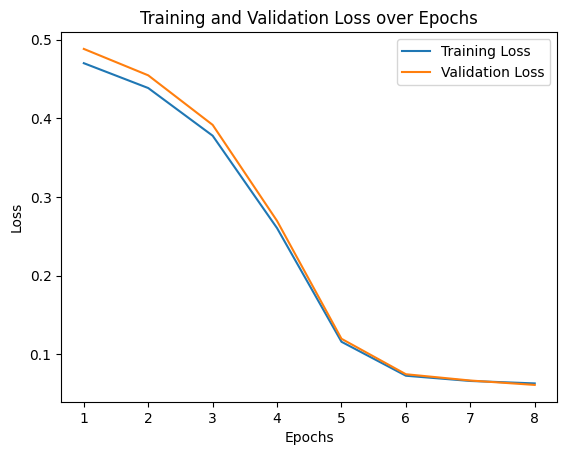

In [39]:
def plot_loss(Cost_loss, Validation_loss):
    epochs = len(Cost_loss)
    plt.plot(range(1, epochs + 1), Cost_loss, label='Training Loss')
    plt.plot(range(1, epochs + 1), Validation_loss, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss over Epochs')
    plt.show()
plot_loss(cost_loss, Validation_loss)


In [40]:
def predict(X, parameters):
    A2, cache =  forward_propagation(X, parameters)
    return A2

In [41]:
Data.describe()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


In [42]:
inputs=np.array(Data.drop(['TOTAL VALUE '],axis=1)).astype('float64').T
inputs = (inputs - np.mean(inputs, axis=1, keepdims=True)) / np.std(inputs, axis=1, keepdims=True)

X_pred = np.array([list(inputs[0][5302:]),
                   list(inputs[1][5302:]),
                   list(inputs[2][5302:]),
                   list(inputs[3][5302:]),
                   list(inputs[4][5302:]),
                   list(inputs[5][5302:]),
                   list(inputs[6][5302:]),
                   list(inputs[7][5302:]),
                   list(inputs[8][5302:]),
                   list(inputs[9][5302:]),
                   list(inputs[10][5302:]),
                   list(inputs[11][5302:])])
Y_pred = predict(X_pred, parameters)

In [43]:

outputs=np.array(Data['TOTAL VALUE '])

In [44]:
pd.DataFrame(list(Y_pred[0]*99.177414+392.685715),outputs[5302:])

,0
420.6,399.351285
536.4,531.586042
410.8,381.090876
454.8,466.288211
432.0,482.953417
...,...
404.8,436.978782
407.9,397.484076
406.5,414.814246
308.7,283.018685


Mean Absolute Percentage Error (MAPE):


In [45]:
np.sum(np.abs(Y_pred[0]*99.177414+392.685715-outputs[5302:])/outputs[5302:])/len(Y_pred[0])*100

5.085468811030887

Root Mean Square Error(RMSE)

In [46]:
(np.sum((Y_pred[0]*99.177414+392.685715-outputs[5302:])/outputs[5302:])**2/len(Y_pred[0]))**0.5

0.32621295447512627

In [47]:
inputs.shape

(12, 5802)

In [48]:
[
    [4330-4939.485866942434/1247.649117963497],
    [9965-6278.083764219235/2669.707973847513],
    [1880-1936.7449155463632/35.98991046676451],
    [2436-2924.8421234057223/883.9847256823055],
    [1352-1657.0653223026543/540.4567255588883],
    [2-1.6837297483626337/0.44488397683390424],
    [6-6.994829369183041/1.4376572191563473],
    [3-3.2300930713547054/0.846606716373366],
    [1-1.296794208893485/0.5220397406583658],
    [1-0.613926232333678/0.5338393430003566],
    [1-1.0153395380903136/0.12290988728050037],
    [0-0.7399172699069286/0.5651084443891607]
    ]

[[4326.040965528028],
 [9962.64840056451],
 [1826.1864480786946],
 [2432.691297894148],
 [1348.9339537396097],
 [-1.7846491131130304],
 [1.1345638751859228],
 [-0.8153407112000592],
 [-1.4840909760204166],
 [-0.15002058275286756],
 [-7.260845083790073],
 [-1.3093367781943568]]

In [49]:
inputs.T[0].reshape(12,1)

array([[-0.48854954],
       [ 1.38113758],
       [-1.57682544],
       [-0.55304604],
       [-0.56450702],
       [ 0.71096629],
       [-0.69203917],
       [-0.27180614],
       [-0.568577  ],
       [ 0.72326449],
       [-0.12481388],
       [-1.30944963]])

In [50]:
a,b=forward_propagation(inputs, parameters)
a

array([[-0.41206903,  0.6960369 , -0.35479941, ...,  0.22312066,
        -1.10576617,  0.223033  ]])

In [51]:
import json
for key, value in parameters.items():
    if isinstance(value, np.ndarray):
        parameters[key] = value.tolist()
file_path = 'parameters.json'
with open(file_path, 'w') as json_file:
    json.dump(parameters, json_file)

print(f'Dictionary saved to {file_path}')


Dictionary saved to parameters.json


In [52]:
inputs = (inputs - np.mean(inputs, axis=1, keepdims=True)) / np.std(inputs, axis=1, keepdims=True)

In [53]:
Data.describe()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000
